<a href="https://colab.research.google.com/github/JyzMinaBF/StarRecognition/blob/main/StarRecognition_direct_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 1. 讀入明星資料圖檔

這裡把在 GitHub 上 的明星照片集讀進來。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/CAI,YI-LIN.zip \
    -O /content/CAI,YI-LIN.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/CHEN,JING-SYUAN.zip \
    -O /content/CHEN,JING-SYUAN.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/GUO,SYUE-FU.zip \
    -O /content/GUO,SYUE-FU.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/LIN,JHIH-LING.zip \
    -O /content/LIN,JHIH-LING.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/LIN,SIN-RU.zip \
    -O /content/LIN,SIN-RU.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/LIN,SIN-RU2.zip \
    -O /content/LIN,SIN-RU2.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/LIN,YI-CHEN.zip \
    -O /content/LIN,YI-CHEN.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/SHAO,YU-WEI.zip \
    -O /content/SHAO,YU-WEI.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/SYU,RUO-SYUAN.zip \
    -O /content/SYU,RUO-SYUAN.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/SYU,SI-DI.zip \
    -O /content/SYU,SI-DI.zip
!wget --no-check-certificate \
    https://github.com/JyzMinaBF/StarRecognition/raw/main/YANG,CHENG-LIN.zip \
    -O /content/YANG,CHENG-LIN.zip

In [ ]:
star_folders = ['CAI,YI-LIN', 'CHEN,JING-SYUAN', 'GUO,SYUE-FU','LIN,JHIH-LING','LIN,SIN-RU','LIN,YI-CHEN','SHAO,YU-WEI','SYU,RUO-SYUAN','SYU,SI-DI','YANG,CHENG-LIN']

In [ ]:
# import os
# import zipfile

# for i in range(11):
#   local_zip = '/content/'+str(star_folders[i])+'.zip'
#   zip_ref = zipfile.ZipFile(local_zip, 'r')
#   zip_ref.extractall('/content')
#   zip_ref.close()

####可以先捕捉臉部特寫

In [ ]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import matplotlib.pyplot as plt
# import os
# base_dir = '/content/'
# notebook_dir = '/content/drive/MyDrive/Colab Notebooks/'
# star_folders = ['CAI,YI-LIN', 'CHEN,JING-SYUAN', 'GUO,SYUE-FU','LIN,JHIH-LING','LIN,SIN-RU','LIN,YI-CHEN','SHAO,YU-WEI','SYU,RUO-SYUAN','SYU,SI-DI','YANG,CHENG-LIN']
# star_folders_capture = ['CAI,YI-LIN_capture', 'CHEN,JING-SYUAN_capture', 'GUO,SYUE-FU_capture','LIN,JHIH-LING_capture','LIN,SIN-RU_capture',
#                            'LIN,YI-CHEN_capture','SHAO,YU-WEI_capture','SYU,RUO-SYUAN_capture','SYU,SI-DI_capture','YANG,CHENG-LIN_capture']

# for i in range(11):
#   count = int(1)
#   thedir = base_dir + star_folders[i]
#   savedir = notebook_dir + star_folders_capture[i]
#   star_fnames = os.listdir(thedir)
#   for star in star_fnames:
#     if star==".DS_Store":
#       continue
#     img_path = thedir + '/' + star
#     save_path = savedir + '/' + str(star_folders[i]) + str(count) + '.jpg'
#     faces = RetinaFace.extract_faces(img_path = img_path, align = True)
#     for face in faces:
#       plt.axis('off')
#       plt.imshow(face)
#       plt.imsave(save_path, face,  format='jpg')
#       count += 1


大家在處理照片時，常會想，要怎麼標記呢? 其實可以像這樣子: 有十個類別, 就用十個資料夾存, 每個資料夾裡的照片讀出來, 就用 0, 1, 2 ,...,10來標記!

# 2. 把明星的照片轉成訓練資料


In [ ]:
base_dir = '/content/drive/MyDrive/StarRecognition/'

我們可以列出在某個資料夾的檔名!

In [ ]:
thedir = base_dir + star_folders[0]
os.listdir(thedir)

['22bc6dc11ed054513c10ea4d67b39073.jpeg',
 '3903588_1.jpeg',
 '20220501002969.jpeg',
 '20201217001601.jpeg',
 '3472463_1.jpeg',
 '20190304160702-e1b22eec7a81c14d6d7370b0189de756-mobile.jpeg',
 '556.jpeg',
 'down.jpeg',
 'down (1).jpeg',
 'f7f8c054fcac7e798b62e0ddadd35cb8.jpeg',
 '800x_100_w-5c347825b232c.jpeg',
 '20220412001410.jpeg',
 '60892ffbc2807.jpeg',
 '1634721243738-f28a2c745250455e8c81f4669bc2f09e-300x450.jpeg',
 'd4623847.jpeg',
 '1901141123131470-450x299.jpeg',
 'C1458030224554.jpeg',
 '1910231136101470-450x300.jpeg',
 '2008TaipeiGameShow_Day3_IGS_JolinTsai_with_WeDancingOnline_theme.jpeg',
 'article-626666396ae01.jpeg',
 '20211020200915-93839502d9140fdafe18c379622c0789-tablet.jpeg',
 'mPwxjGYSvqYiSROhWRQhmuLsIE1L8JXIkf5bqENZ.jpeg',
 '0417-1140-2.jpg_1140x855.jpg',
 '20190630-120011_U12879_M532242_5d6e.jpeg',
 '81a3a40b-363a-42e5-83f1-6fc4f7b9e1c8.jpeg',
 '202201082068162_l.jpeg',
 '3579422-PH.jpeg',
 '1600227389740-6779e8a0d8d04695abd652dc6ed8ac2f-800x1200.jpeg',
 '191217042

做成輸入 (data)、輸出 (target)。

In [ ]:
data = []
target = []

for i in range(10):
  thedir = base_dir + star_folders[i]
  star_fnames = os.listdir(thedir)
  for star in star_fnames:
    if star==".DS_Store":
      continue
    img = load_img(thedir + '/' + star, target_size = (256,256))
    x = img_to_array(img)
    data.append(x)
    target.append(i)

臉部特寫版的訓練資料轉換



In [ ]:
# data = []
# target = []
# notebook_dir = '/content/drive/MyDrive/Colab Notebooks/'#要改成你存照片資料夾的路徑，不包含資料夾名稱
# star_folders_capture = ['CAI,YI-LIN_capture', 'CHEN,JING-SYUAN_capture', 'GUO,SYUE-FU_capture','LIN,JHIH-LING_capture','LIN,SIN-RU_capture',
#               'LIN,SIN-RU2_capture','LIN,YI-CHEN_capture','SHAO,YU-WEI_capture',
#               'SYU,RUO-SYUAN_capture','SYU,SI-DI_capture','YANG,CHENG-LIN_capture']#改成你存照片的資料夾名稱

# for i in range(11):
#   savedir = notebook_dir + star_folders_capture[i]
#   star_fnames = os.listdir(savedir)
#   for star in star_fnames:
#     if star==".DS_Store":
#       continue
#     img = load_img(savedir + '/' + star, target_size = (256,256))
#     x = img_to_array(img)
#     data.append(x)
#     target.append(i)

In [ ]:
data = np.array(data)

In [ ]:
len(data)

3471

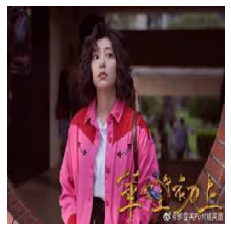

In [ ]:
n=878
plt.axis('off')
plt.imshow(data[n]/255);

In [ ]:
x_train = preprocess_input(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


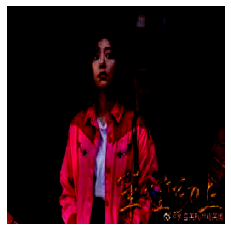

In [ ]:
plt.axis('off')
plt.imshow(x_train[n]);

一個答案就是 0到9 其中一個數字。

In [ ]:
target[n]

2

做 one-hot enconding。

In [ ]:
y_train = to_categorical(target, 0)

In [ ]:
y_train[n]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 3. 用 ResNet50 打造我們的神經網路

ResNet50 是 2015 ImageNet 的冠軍, 我們用第二版來試試。原本 ImageNet 是做了 1,000 個類別的圖形辨識。我們想直接用來辨識八哥, 就是把最後一層 (通常就 1,000 個輸出的 dense 層) 砍掉 (`include_top=False`), 然後換我們的就好。

再來我們可以把每個 filter 的結果做個大總合, 例如算每個 filter 計分板的總平均 (global avg pooling), 這本來該我們自己做, 但是 `tf.Keras` 是善良無比的幫我們做好。只要下個參數 `pooling="avg"`)。

In [ ]:
resnet = ResNet50V2(include_top=False, pooling="avg")

我們是遷移式學習, 原本 ResNet 的部份我們當然沒有重新訓練的意思。於是就設這邊不需要訓練。

In [ ]:
resnet.trainable = False

再來就是正式打造我們遷移學習版的函數學習機! 可以發現我們只是加入了最後一層...

In [ ]:
model = Sequential()

In [ ]:
model.add(resnet)

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的函數學習機

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 欣賞我們的神經網路

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


結合ResNet並參考老師所賦予知方法做成，參數極多

### 訓練 fit

In [ ]:
model.fit(x_train, y_train, batch_size=500, epochs=50)

NameError: ignored

# 4. 用 `gradio` 打造明星辨識 web app!#

In [ ]:
labels = ["蔡依林","陳敬宣","郭雪芙","林志玲","林心如","林依晨","邵雨薇","徐若瑄","徐熙娣","楊丞琳"]

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def classify_image(inp):
  inp = inp.reshape((-1, 256, 256, 3))
  inp = preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(10)}

image = gr.inputs.Image(shape=(256, 256), label="明星照片")
label = gr.outputs.Label(num_top_classes=3, label="AI辨識結果")

In [ ]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
             title="AI 明星辨識機",
             description="我能辨識台灣的十位明星:蔡依林,陳敬宣,郭雪芙,林志玲,林心如,林依晨,邵雨薇,徐若瑄,徐熙娣,楊丞琳。快找張照片來考我吧!",
             capture_session=True).launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:248: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://19127.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7fbf1623e2d0>,
 'http://127.0.0.1:7860/',
 'https://19127.gradio.app')

####使用deepface套件的版本

In [ ]:
pip install deepface

In [ ]:
!wget --no-check-certificate \
    https://github.com/Bo-An-Chen/StarFaceRecognition/raw/main/deepface_database.zip \
    -O /content/deepface_database.zip

In [ ]:
import os
import zipfile

local_zip = '/content/deepface_database.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from deepface import DeepFace
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
# labels = ["蔡依林","陳敬宣","郭雪芙","林志玲","林心如","林依晨","邵雨薇","徐若瑄","徐熙娣","楊丞琳"]
names = {"/content/deepface_database/CAI,YI-LIN65.jpg":"蔡依林",
         "/content/deepface_database/CHEN,JING-SYUAN96.jpg":"陳敬宣",
         "/content/deepface_database/GUO,SYUE-FU36.jpg":"郭雪芙","/content/deepface_database/LIN,JHIH-LING65.jpg":"林志玲",
         "/content/deepface_database/LIN,SIN-RU217.jpg":"林心如",
         "/content/deepface_database/LIN,YI-CHEN36.jpg":"林依晨",
         "/content/deepface_database/SHAO,YU-WEI102.jpg":"邵雨薇",
         "/content/deepface_database/SYU,RUO-SYUAN14.jpg":"徐若瑄",
         "/content/deepface_database/SYU,SI-DI119.jpg":"徐熙娣",
         "/content/deepface_database/YANG,CHENG-LIN100.jpg":"楊丞琳"}
def classify_image(inp):
  plt.axis('off')
  plt.imshow(inp)
  plt.imsave("input001.jpg", inp, format='jpg')
  img = cv2.imread('input001.jpg')
  dst = cv2.resize(img,(225,225))
  cv2.imwrite('resize.jpg', dst)
  df = DeepFace.find(img_path="resize.jpg", db_path = "/content/deepface_database",
                   enforce_detection=False, detector_backend='retinaface')
  prediction = {}
  for i in range(3):
    name = names[df.at[i, "identity"]]
    cosine = float(df.at[i, "VGG-Face_cosine"])
    ReverseOrder = (cosine)*(-1)
    Activation = 100**(ReverseOrder)
    prediction[name] = Activation
  return prediction
image = gr.inputs.Image(shape=(256, 256), label="明星照片")
label = gr.outputs.Label(num_top_classes=3, label="AI辨識結果")

In [ ]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
              title="AI 明星辨識機",
             description="我能辨識台灣的十位明星:蔡依林,陳敬宣,郭雪芙,林志玲,林心如,林依晨,邵雨薇,徐若瑄,徐熙娣,楊丞琳。快找張照片來考我吧!",
             capture_session=True).launch(debug=True)

# 5. 存檔

In [ ]:
#存檔用
from google.colab import drive
import os
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks"#複製好你要存的路徑貼過來
os.chdir(path)
model_json = model.to_json()
open('明星辨識_model_architecture_0511_0.7330.json', 'w').write(model_json)#檔名要改
model.save_weights('明星辨識_model_weights_0511_0.7330.h5')#檔名要改

path="/content"
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


讀檔

In [ ]:
import os
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks"#你存檔的路徑貼過來
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pickle

from tensorflow.keras.models import load_model, model_from_json
f = open('明星辨識_model_architecture_0514_0.7127_retina-face.json')
loaded_model = f.read()
f.close()

model = model_from_json(loaded_model)

model.load_weights('明星辨識_model_weights_0514_0.7127_retina-face.h5')
path="/content"
os.chdir(path)